In [1]:
import numpy as np
import struct
import os

In [23]:
def extract_serial_numbers_and_ids(file_path):
    serial_number_id_list = []

    # Open the file in read mode
    with open(file_path, 'r') as file:
        # Iterate over each line in the file
        for line in file:
            # Split the line into parts based on whitespace
            parts = line.strip().split()
            if len(parts) >= 3:
                username = parts[0]
                serial_number = parts[1]
                user_id = int(parts[2])
                # Append a tuple of (serial_number, user_id) to the list
                serial_number_id_list.append((serial_number, user_id))

    return serial_number_id_list

# Example usage:
file_path = '../shell/leaf_nodes_id.conf'
result_list = extract_serial_numbers_and_ids(file_path)

# Print the list of (serial_number, user_id) tuples
M_list = []
device_list = []
for serial_number, user_id in result_list:
    print(f"Serial Number: {serial_number}, ID: {user_id}")
    M_list.append(user_id)
    device_list.append(serial_number)

Serial Number: 32B172B, ID: 29
Serial Number: 32C793E, ID: 53
Serial Number: 32B1708, ID: 89
Serial Number: 32C7981, ID: 113
Serial Number: 32C7920, ID: 151
Serial Number: 32C79F7, ID: 197
Serial Number: 32B1728, ID: 211
Serial Number: 32C79BE, ID: 233


In [24]:
# create list of devices and their signal identifiers (ZFC id M_zfc)
# device_list = ["32C793E", "32C79BE", "32C7981", "32B172B", "32B1708", "32B1728", "32C7920", "32C79C6"]
# M_list = [31, 73, 109, 139, 97, 173, 211, 229]


In [26]:
## cleck logfiles to find which runs and devices failed
MC_runs = 10
run_success = np.zeros((len(result_list), MC_runs), dtype=bool)
LogFolder = "/home/nuc/OTA-C/shell/LogFolder"

for logfile in os.listdir(LogFolder):
    logpath = os.path.join(LogFolder, logfile)

    if os.path.isfile(logpath):
        device_id = logfile.split("_")[-2]
        run_id = int(logfile.split("_")[-1].split(".")[0])
        # print(logfile, device_id, run_id)
        with open(logpath, 'r') as f:
            lines = f.readlines()
            last_line = lines[-1]
            if (last_line.startswith("Transmitted")):
                dev_id_num = device_list.index(device_id)
                run_success[dev_id_num, run_id] = True
            else:
                if (device_id in result_list):
                    print("Failed for ", device_id, " run ", run_id)


logfile_32C79F7_9.log 32C79F7 9
logfile_32C7981_6.log 32C7981 6
logfile_32B1708_5.log 32B1708 5
logfile_32B1728_7.log 32B1728 7
logfile_32B1708_7.log 32B1708 7
logfile_32C7920_8.log 32C7920 8
logfile_32C793E_9.log 32C793E 9
logfile_32B1728_6.log 32B1728 6
logfile_32B1708_0.log 32B1708 0
logfile_32C79C6_6.log 32C79C6 6
logfile_32B1728_5.log 32B1728 5
logfile_32C79BE_2.log 32C79BE 2
logfile_32B172B_4.log 32B172B 4
logfile_32B1708_6.log 32B1708 6
logfile_32C7920_0.log 32C7920 0
logfile_32C79F7_2.log 32C79F7 2
logfile_32C7981_1.log 32C7981 1
logfile_32C7920_4.log 32C7920 4
logfile_32C7981_0.log 32C7981 0
logfile_32C793E_8.log 32C793E 8
logfile_32B172B_2.log 32B172B 2
logfile_32B172B_7.log 32B172B 7
logfile_32B1708_8.log 32B1708 8
logfile_32C7981_3.log 32C7981 3
logfile_32C7920_5.log 32C7920 5
logfile_32C79BE_7.log 32C79BE 7
logfile_32C7920_1.log 32C7920 1
logfile_32C7981_8.log 32C7981 8
logfile_32C7981_2.log 32C7981 2
logfile_32B172B_8.log 32B172B 8
logfile_32C79BE_9.log 32C79BE 9
logfile_

In [20]:
samples_all = []
for i in range(MC_runs):
    file_path = "./storage/run_%d_data.dat" %i
    sample_size = 8
    try:
        with open(file_path, 'rb') as f:
            # Read the binary data
            binary_data = f.read()
    except:
        print("File %s not found!"%file_path)
        continue

    num_samples = len(binary_data) // sample_size
    samples = []
    for i in range(num_samples):
        # Extract real and imaginary parts from the binary data
        real_part, imag_part = struct.unpack('ff', binary_data[i * sample_size: (i + 1) * sample_size])
        # Create a complex number and append it to the list of samples
        samples.append(complex(real_part, imag_part))

    samples = np.array(samples)
    samples_all.append(samples)

print(samples_all[0].shape)

(1028,)


In [21]:
N = 257

zfc_seq_list = [np.array([np.exp(-1j * np.pi * M * n * (n + 1) / N) for n in range(N)]) for M in M_list]

10


10it [00:00, 2270.26it/s]

Tvar 29 0 569.7 79.40999999999998
Tvar 53 1 572.6666666666666 1147.7777777777778
Tvar 89 2 572.3333333333334 0.2222222222222222
Tvar 113 3 562.375 1393.234375
Tvar 151 4 578.0 1256.5714285714287
Tvar 197 5 nan nan
Tvar 211 6 572.3333333333334 0.2222222222222222
Tvar 233 7 568.4444444444445 323.80246913580254



/tmp/ipykernel_2071790/2521222578.py:26: RuntimeWarning: Mean of empty slice
  tmean, tvar = np.nanmean(timing), np.nanvar(timing)
/tmp/ipykernel_2071790/2521222578.py:26: RuntimeWarning: Degrees of freedom <= 0 for slice.
  tmean, tvar = np.nanmean(timing), np.nanvar(timing)


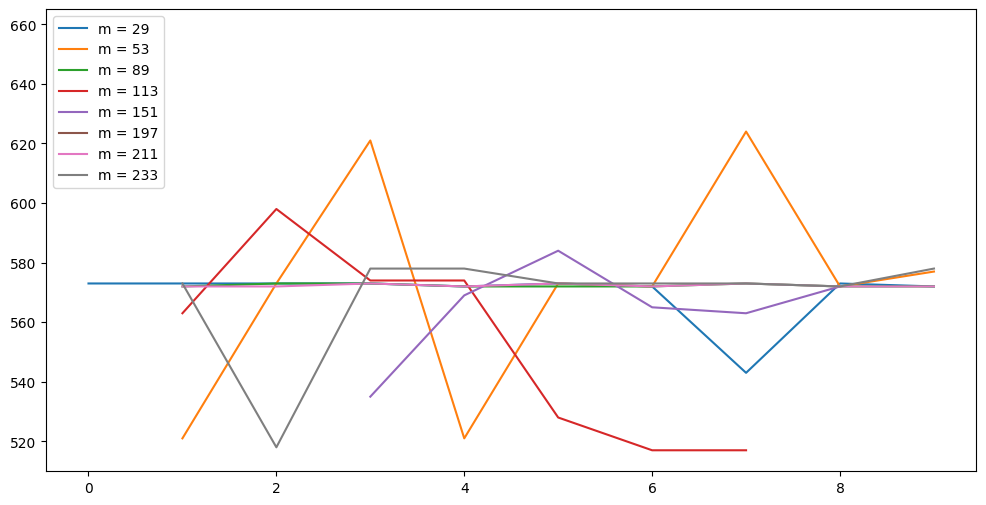

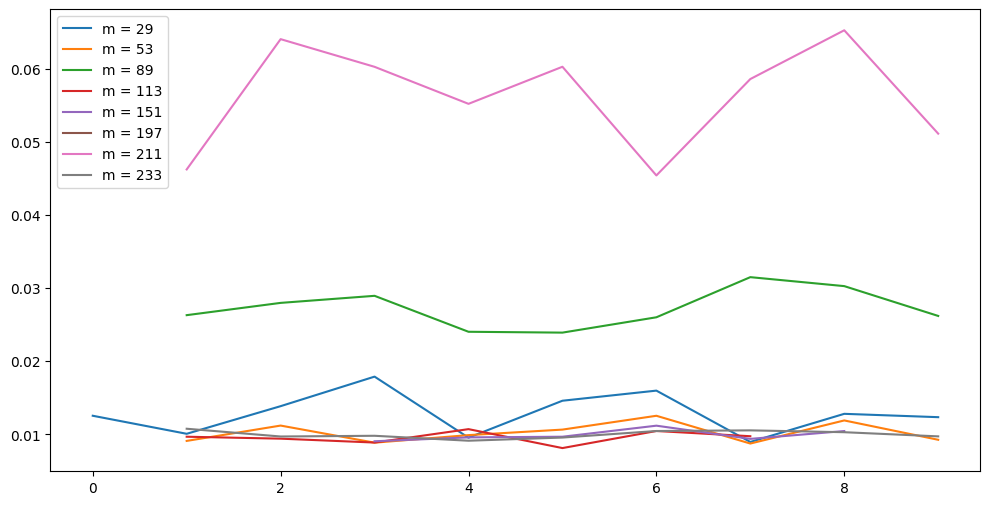

In [22]:
from tqdm import tqdm
from matplotlib import pyplot as plt

print(len(samples_all))

fig, ax = plt.subplots(figsize=[12, 6])
fig2, ax2 = plt.subplots(figsize=[12, 6])
timing_arr = np.zeros((len(samples_all), len(M_list)))
vals_arr = np.zeros((len(samples_all), len(M_list)))
for n, samples in tqdm(enumerate(samples_all)):
    corr_zfc_list = np.array([np.correlate(samples, zfc_seq, mode='valid') / N for zfc_seq in zfc_seq_list])
    for i in range(len(M_list)):
        # if (M_list[i] == 139):
        #     continue
        if (run_success[i, n] == True):
            timing_arr[n, i] = np.argmax(np.abs(corr_zfc_list[i])).item()
            vals_arr[n, i] = np.max(np.abs(corr_zfc_list[i])).item()
        else:
            timing_arr[n, i] = np.nan
            vals_arr[n, i] = np.nan

for i in range(len(M_list)):
    # if (M_list[i] == 139):
    #     continue
    timing = timing_arr[:, i]
    tmean, tvar = np.nanmean(timing), np.nanvar(timing)
    print("Tvar %d %d"%(M_list[i], i), tmean, tvar)
    plot_timing = timing
    # plot_timing = np.where(np.abs(timing - tmean) < 50, timing, np.nan)
    # if np.abs(np.min(timing) - tmean) < 50:
    #     print(plot_timing[i])
    # tmean, tvar = np.mean(plot_timing), np.var(plot_timing)
    # print("plot Tvar %d"%i, tmean, tvar)
    ax.plot(np.arange(len(samples_all)), plot_timing, label="m = %d"%M_list[i])
    ax2.plot(np.arange(len(samples_all)), vals_arr[:, i], label="m = %d"%M_list[i])

ax.legend()
ax2.legend()
# for i in range(len(M_list)):
#     print("%d -- %.5e" %(np.argmax(np.abs(corr_zfc_list[i])).item(), np.max(np.abs(corr_zfc_list[i])).item()))

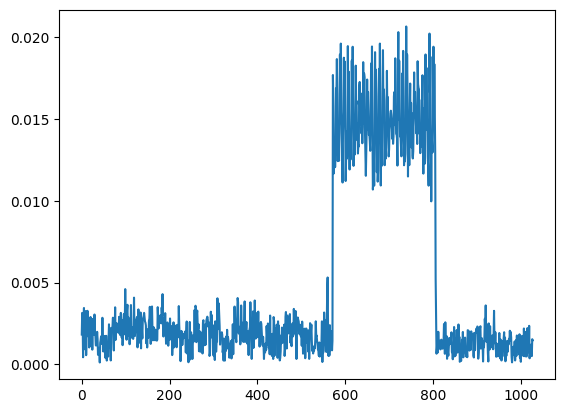

In [13]:
from matplotlib import pyplot as plt
plt.plot(np.abs(samples))

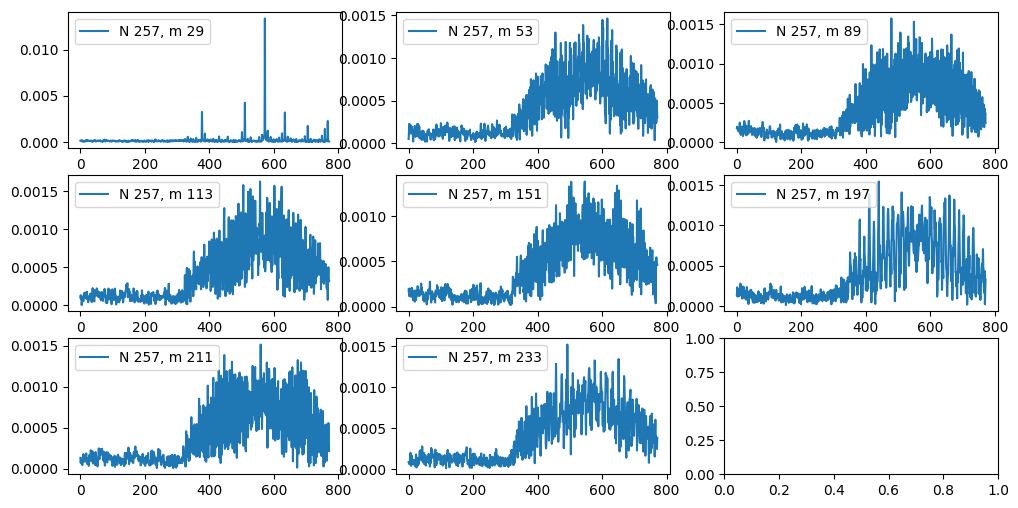

In [15]:
plot_data_list = [np.abs(corr_zfc) for corr_zfc in corr_zfc_list]

fig, ax = plt.subplots(3, 3, figsize=[12,6])
axs = ax.flatten()
for i in range(len(M_list)):
    axs[i].plot(plot_data_list[i], label="N %d, m %d" %(N, M_list[i]))
    axs[i].legend()

# print(np.diff(np.argwhere(plot_data > 60.0).squeeze()))
# print(plot_data[np.argwhere(plot_data > 60.0).squeeze()])


In [ ]:
# floating window - to find the threshold
window_len = N
relevant_signal = np.abs(samples[pmax-5*N : pmax + 5*N])
ma_signal = np.zeros((relevant_signal.size - N + 1), dtype=float)
for i in range(ma_signal.size):
    for j in range(N):
        ma_signal[i] += relevant_signal[i + j]
    ma_signal[i] /= N
plt.plot(ma_signal)
print(np.max(ma_signal))
pp = np.argmax(ma_signal).squeeze()
print(np.mean(ma_signal))
print(np.mean(np.delete(ma_signal, np.arange(pp - N//2 - 1, pp + N//2 + 1))))
# plt.yscale("log")